In [1]:
import numpy as np
import pandas as pd
import beret as be
from beret import Edit
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

INFO  @ Mon, 06 Mar 2023 22:03:24:
	 generated new fontManager 



In [2]:
from beret.plotting.editing_patterns import plot_by_pos_context

In [3]:
plt.style.use('default')

In [ ]:
library="LDLRCDS"

In [4]:
bdata = be.read_h5ad(f"../results/filtered_annotated/{library}/beret_count_{library}_masked.h5ad")

# Rewrite with ReporterScreen


In [5]:
bdata_bulk = bdata[:,bdata.samples.bin == "bulk"]

In [6]:
bdata_bulk_fs = bdata_bulk[:,bdata_bulk.samples.median_editing_rate > 0.2]

In [7]:
bdata_bulk_fs.samples

,rep,bin,gini_X,median_corr_X,median_lfc_corr.top_bot,median_editing_rate,mask
rep3_bulk,rep3,bulk,0.331829,0.893009,0.272480,0.225490,1
rep4_bulk,rep4,bulk,0.344525,0.897441,0.326278,0.239336,1
rep5_bulk,rep5,bulk,0.429016,0.851955,0.333427,0.479853,1
rep6_bulk,rep6,bulk,0.424607,0.862105,0.224426,0.482143,1
rep7_bulk,rep7,bulk,0.403226,0.890498,0.321003,0.448276,1
rep8_bulk,rep8,bulk,0.411441,0.887678,0.339780,0.461983,1
rep9_bulk,rep9,bulk,0.425325,0.861368,-0.005720,0.466667,1


In [8]:
edit_rates_df = be.pl.editing_patterns.get_edit_rates(bdata_bulk_fs)

Calibrating edits in editable positions...:   0%|          | 0/7320 [00:00<?, ?it/s]

In [ ]:
c

(<AxesSubplot: xlabel='Protospacer position', ylabel='A>G editing rate'>,
                               guide               edit  rep_median  rep_mean  \
 0                       10_2511_neg  11224163:25:-:A>-    0.000000  0.000000   
 1                       10_2511_neg  11224163:25:-:A>G    0.063415  0.069904   
 2                       10_2511_neg  11224163:25:-:A>T    0.000000  0.000000   
 3                       10_2511_neg  11224164:24:-:C>-    0.000000  0.000000   
 4                       10_2511_neg  11224165:23:-:T>-    0.000000  0.000000   
 ...                             ...                ...         ...       ...   
 268834  Intron 1 DNaseHS 2_5713_pos          8:8:+:A>G    0.000000  0.000000   
 268835  Intron 1 DNaseHS 2_5713_pos          9:9:+:A>G    0.000000  0.000000   
 268836  Intron 1 DNaseHS 2_5713_pos        11:11:+:A>G    0.000000  0.000000   
 268837  Intron 1 DNaseHS 2_5713_pos        15:15:+:A>G    0.000000  0.000000   
 268838  Intron 1 DNaseHS 2_5713_po

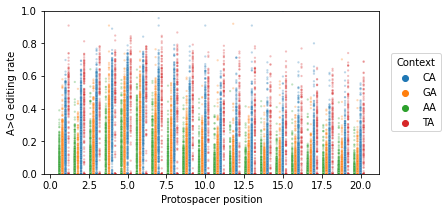

In [25]:
be.pl.editing_patterns.plot_by_pos_context(edit_rates_df)
plt.savefig()

### BE-Hive like plotting


In [26]:
bdata_bulk_fs.get_normalized_allele_counts(bdata_bulk_fs.uns['edit_counts'])

,guide,edit,rep3_bulk,rep4_bulk,rep5_bulk,rep6_bulk,rep7_bulk,rep8_bulk,rep9_bulk
0,10_2511_neg,11224157:31:-:G>T,0.0,0.000000,0.0,0.0,0.009615,0.000000,0.000000
1,10_2511_neg,11224158:30:-:C>A,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,10_2511_neg,11224159:29:-:G>C,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,10_2511_neg,11224159:29:-:G>T,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,10_2511_neg,11224160:28:-:T>C,0.0,0.000000,0.0,0.0,0.076923,0.020408,0.073171
...,...,...,...,...,...,...,...,...,...
398259,Intron 1 DNaseHS 2_5713_pos,11203094:26:+:A>G,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
398260,Intron 1 DNaseHS 2_5713_pos,11203095:27:+:A>G,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
398261,Intron 1 DNaseHS 2_5713_pos,11203097:29:+:G>T,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
398262,Intron 1 DNaseHS 2_5713_pos,11203098:30:+:A>G,NaN,0.081081,0.0,NaN,NaN,NaN,NaN


In [ ]:
get_edit_rates(bdata)

In [21]:
edit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context,spacer_pos_ctxt,pam,pam23,pam2,pam3,pam12,pam34
0,10_2511_neg,11224163:25:-:A>-,0.000000,0.000000,25,20,A>-,CA,20.0,CCTGC,CT,C,T,CC,TG
1,10_2511_neg,11224163:25:-:A>G,0.063415,0.069904,25,20,A>G,CA,20.0,CCTGC,CT,C,T,CC,TG
2,10_2511_neg,11224163:25:-:A>T,0.000000,0.000000,25,20,A>T,CA,20.0,CCTGC,CT,C,T,CC,TG
3,10_2511_neg,11224164:24:-:C>-,0.000000,0.000000,24,19,C>-,TC,NaN,CCTGC,CT,C,T,CC,TG
4,10_2511_neg,11224165:23:-:T>-,0.000000,0.000000,23,18,T>-,CT,NaN,CCTGC,CT,C,T,CC,TG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268834,Intron 1 DNaseHS 2_5713_pos,8:8:+:A>G,0.000000,0.000000,8,3,A>G,AA,2.6,AAAGA,AA,A,A,AA,AG
268835,Intron 1 DNaseHS 2_5713_pos,9:9:+:A>G,0.000000,0.000000,9,4,A>G,AA,3.6,AAAGA,AA,A,A,AA,AG
268836,Intron 1 DNaseHS 2_5713_pos,11:11:+:A>G,0.000000,0.000000,11,6,A>G,TA,6.2,AAAGA,AA,A,A,AA,AG
268837,Intron 1 DNaseHS 2_5713_pos,15:15:+:A>G,0.000000,0.000000,15,10,A>G,CA,10.0,AAAGA,AA,A,A,AA,AG


In [24]:
bdata_bulk_fs.guides.loc["Intron 1 DNaseHS 2_5713_pos"]

Region                           Intron 1 DNaseHS 2
pos                                            5713
strand                                          pos
sequence                       AAAATACCCACCTTATTTGG
Reporter           CTGGGGAAAATACCCACCTTATTTGGAAAGAA
barcode                                        CTCC
5-nt PAM                                      AAAGA
targetPos                                11203079.0
pos_seq                        AAAATACCCACCTTATTTGG
guide_len                                        20
start_pos                                  11203074
target_start                                    5.0
masked_sequence                GGGGTGCCCGCCTTGTTTGG
masked_barcode                                 CTCC
Group                            Intron 1 DNaseHS 2
edit_rate                                  0.330049
Name: Intron 1 DNaseHS 2_5713_pos, dtype: object

In [27]:
be.pl.editing_patterns._get_norm_rates_df(
        bdata_bulk_fs,
        edit_rates_df,
        "edit_counts",
        base_changes=[
            "A>G","A>C","A>T","C>T","C>G"
        ]
    )

base_change,A>C,A>T,A>G,C>T,C>G
spacer_pos,,,,,
1,0.000834,0.002853,0.403492,0.003929,0.002405
2,0.000698,0.001890,0.399497,0.004486,0.002225
3,0.001282,0.003206,0.471433,0.005282,0.002708
4,0.000471,0.002358,0.575527,0.005254,0.003413
5,0.000657,0.002286,0.608958,0.008584,0.002615
6,0.000579,0.002468,0.608354,0.007601,0.002803
7,0.000836,0.001608,0.500853,0.006717,0.001462
8,0.000507,0.003645,0.421068,0.004896,0.001987
9,0.001186,0.002726,0.373966,0.004932,0.002590


In [31]:

BASES = ["A", "T", "C", "G"]
def _get_norm_rates_df(
    bdata,
    edit_rates_df=None,
    edit_count_key="edit_counts",
    base_changes = None,
):
    change_by_pos = pd.pivot(
        edit_rates_df.groupby(["base_change", "spacer_pos"])
        .sum()["rep_mean"]
        .reset_index(),
        index="spacer_pos",
        columns="base_change",
        values="rep_mean",
    ).fillna(0)

    norm_matrix = pd.DataFrame(index=change_by_pos.index, columns=BASES)
    for pos in norm_matrix.index:
        pos_base = bdata.guides.Reporter.map(
            lambda s: s[pos] if pos < len(s) else " "
        ).values
        for b in BASES:
            norm_matrix.loc[pos, b] = (pos_base == b).sum()
    ref_bases = change_by_pos.columns.map(lambda s: s.split(">")[0])
    change_by_pos = change_by_pos.loc[:, ref_bases.isin(BASES)]
    norm_rate = (
        change_by_pos
        / norm_matrix.loc[
            :, change_by_pos.columns.map(lambda s: s.split(">")[0])
        ].values
    )
    norm_rate_reduced = pd.DataFrame(index=norm_rate.index, columns=base_changes)
    norm_rate_reduced.loc[
        :, norm_rate.columns[norm_rate.columns.isin(norm_rate_reduced.columns)]
    ] = norm_rate.loc[:, norm_rate.columns.isin(norm_rate_reduced.columns)]
    #norm_rate_reduced = _combine_complementary_base_changes(norm_rate).astype(float)
    return norm_rate_reduced

In [35]:
erdf = _get_norm_rates_df(bdata_bulk_fs,
        edit_rates_df,
        "edit_counts",
        base_changes=[
            "A>G","C>T"
        ])

In [46]:
be.pl.editing_patterns._get_norm_rates_df(bdata, edit_rates_df)

base_change,A>-,A>C,A>G,A>T,C>-,C>A,C>G,C>T,G>-,G>A,G>C,G>T,T>-,T>A,T>C,T>G
spacer_pos,,,,,,,,,,,,,,,,
1,0.000199,0.000199,0.201363,0.00123,0.00017,0.001868,0.001115,0.001802,0.000042,0.000325,0.000176,0.00068,0.00016,0.000393,0.000766,0.000436
2,0.000043,0.000161,0.199535,0.00087,0.000066,0.001109,0.000956,0.001798,0.000241,0.00089,0.000314,0.001031,0.000088,0.000151,0.000428,0.000377
3,0.000335,0.000278,0.235123,0.00102,0.000694,0.001096,0.001043,0.002262,0.000074,0.000758,0.000622,0.001659,0.000117,0.001166,0.001186,0.000726
4,0.000405,0.000144,0.287256,0.000973,0.000263,0.001444,0.001528,0.002038,0.000065,0.001178,0.000357,0.00089,0.000415,0.000411,0.001014,0.000182
5,0.000241,0.000131,0.303811,0.001073,0.000449,0.001142,0.000994,0.003474,0.000554,0.001636,0.000626,0.001661,0.00014,0.000141,0.001336,0.000395
6,0.000503,0.000122,0.30344,0.000983,0.000297,0.001702,0.001264,0.003332,0.000113,0.000936,0.000275,0.001616,0.00016,0.000503,0.001473,0.000336
7,0.000477,0.000171,0.249147,0.000672,0.000263,0.001109,0.000664,0.002867,0.00014,0.000983,0.000133,0.002161,0.00042,0.000264,0.002559,0.000493
8,0.000212,0.000173,0.208303,0.001551,0.000214,0.001956,0.000802,0.002072,0.000185,0.000752,0.000384,0.001043,0.0002,0.000543,0.004463,0.00016
9,0.000332,0.000445,0.184842,0.001134,0.000147,0.001428,0.00085,0.001717,0.000107,0.001499,0.00089,0.001267,0.000572,0.000458,0.004281,0.000297


<AxesSubplot: xlabel='base_change', ylabel='Protospacer position'>

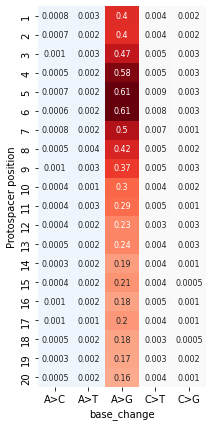

In [42]:
be.pl.editing_patterns.plot_by_pos_behive(
    edit_rates_df,
    bdata_bulk_fs,
    target_basechange=bdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"]
)

In [57]:
import importlib
importlib.reload(be.pl.editing_patterns)

<module 'beret.plotting.editing_patterns' from '/data/pinello/PROJECTS/2021_08_ANBE/software/beret/beret/plotting/editing_patterns.py'>

## Combination with PAM


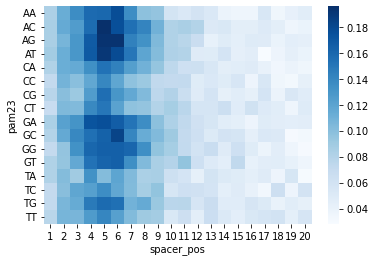

In [47]:
be.pl.editing_patterns.plot_by_pos_pam(bdata_bulk_fs, edit_rates_df)

In [49]:
edit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context,spacer_pos_ctxt,pam,pam23,pam2,pam3,pam12,pam34
0,10_2511_neg,11224163:25:-:A>-,0.000000,0.000000,25,20,A>-,CA,20.0,CCTGC,CT,C,T,CC,TG
1,10_2511_neg,11224163:25:-:A>G,0.063415,0.069904,25,20,A>G,CA,20.0,CCTGC,CT,C,T,CC,TG
2,10_2511_neg,11224163:25:-:A>T,0.000000,0.000000,25,20,A>T,CA,20.0,CCTGC,CT,C,T,CC,TG
3,10_2511_neg,11224164:24:-:C>-,0.000000,0.000000,24,19,C>-,TC,NaN,CCTGC,CT,C,T,CC,TG
4,10_2511_neg,11224165:23:-:T>-,0.000000,0.000000,23,18,T>-,CT,NaN,CCTGC,CT,C,T,CC,TG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268834,Intron 1 DNaseHS 2_5713_pos,8:8:+:A>G,0.000000,0.000000,8,3,A>G,AA,2.6,AAAGA,AA,A,A,AA,AG
268835,Intron 1 DNaseHS 2_5713_pos,9:9:+:A>G,0.000000,0.000000,9,4,A>G,AA,3.6,AAAGA,AA,A,A,AA,AG
268836,Intron 1 DNaseHS 2_5713_pos,11:11:+:A>G,0.000000,0.000000,11,6,A>G,TA,6.2,AAAGA,AA,A,A,AA,AG
268837,Intron 1 DNaseHS 2_5713_pos,15:15:+:A>G,0.000000,0.000000,15,10,A>G,CA,10.0,AAAGA,AA,A,A,AA,AG


/data/pinello/PROJECTS/2021_08_ANBE/software/beret/beret/plotting/editing_patterns.py:353: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


array([<AxesSubplot: xlabel='Protospacer position', ylabel='A>G editing rate'>,
       <AxesSubplot: xlabel='Protospacer position', ylabel='PAM'>],
      dtype=object)

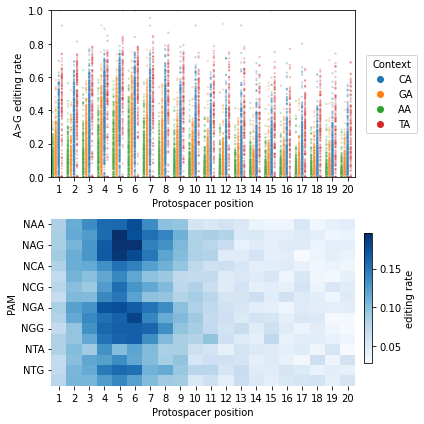

In [51]:
be.pl.editing_patterns.plot_by_pos_pam_and_context(bdata_bulk_fs, edit_rates_df)

/data/pinello/PROJECTS/2021_08_ANBE/software/beret/beret/plotting/editing_patterns.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def norm(row):


<AxesSubplot: title={'center': 'PAM preference'}>

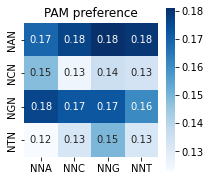

In [58]:
be.pl.editing_patterns.plot_pam_preference(bdata_bulk_fs, edit_rates_df)